In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

In [53]:
length = 1000000
density = 3.0
w = 1.0
ep = 1.0
# in optics we use exp(-2x**2/w**2) the corresponding sigma for a normal
# distribution is exp(-x**2/2/sigma**2)
# 2/w**2 = 1/2/sigma**2
# 2 sigma = w
sigma = w/2
L = 100
N = int(2*L*density)

In [54]:
# generate positions for all particles
positions=2*L*np.random.random(size=(N,length))-L
# place a Gaussian illumination at x=0 with std = sigma
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(positions, loc=0,scale=sigma)
#print(intensity)
intensity = np.sum(intensity, axis=0)

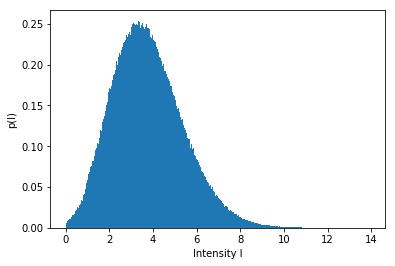

In [55]:
a=plt.hist(intensity,bins=500,density=True)
#plt.yscale('log')
#plt.ylim((1e-1,2))
#plt.xlim((0,16))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIsim3.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [56]:
moments = [np.mean(intensity**(i+1)) for i in range(10)]
n = np.arange(10)+1
moments=np.array(moments)
print(moments)

[3.75769581e+00 1.67419776e+01 8.47130905e+01 4.75445205e+02
 2.91418182e+03 1.92919171e+04 1.36784593e+05 1.03191799e+06
 8.23903812e+06 6.93066126e+07]


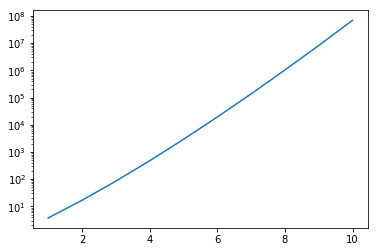

In [57]:
plt.semilogy(n,moments)

In [58]:
2/np.sqrt(2)

1.414213562373095

In [59]:
(np.pi/2)**3

3.875784585037477